Shape of the dataset (549, 43)
dataset variable types: Sign    int32
X1      int64
X2      int64
X3      int64
X4      int64
X5      int64
X6      int64
X7      int64
X8      int64
X9      int64
X10     int64
X11     int64
X12     int64
X13     int64
X14     int64
X15     int64
X16     int64
X17     int64
X18     int64
X19     int64
X20     int64
X21     int64
Y1      int64
Y2      int64
Y3      int64
Y4      int64
Y5      int64
Y6      int64
Y7      int64
Y8      int64
Y9      int64
Y10     int64
Y11     int64
Y12     int64
Y13     int64
Y14     int64
Y15     int64
Y16     int64
Y17     int64
Y18     int64
Y19     int64
Y20     int64
Y21     int64
dtype: object
first 10 rows of the dataset
   Sign   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  Y12  Y13  Y14  Y15  \
0     1   97  144  184  198  192  157  163  156  152  ...  101  133   92   63   
1     1  109  142  173  177  160  155  148  147  151  ...  119  121  108   91   
2     1  119  143  156  158  164  135  147  146  142  ...

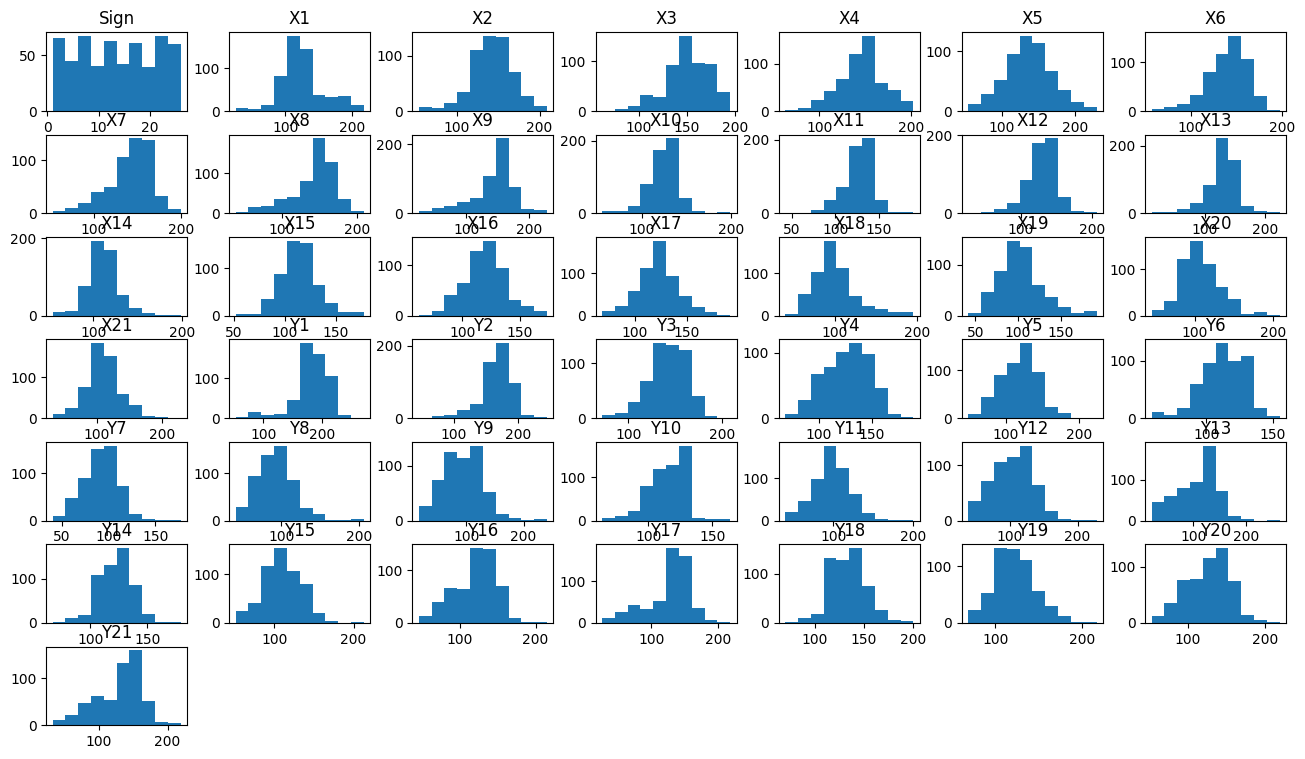

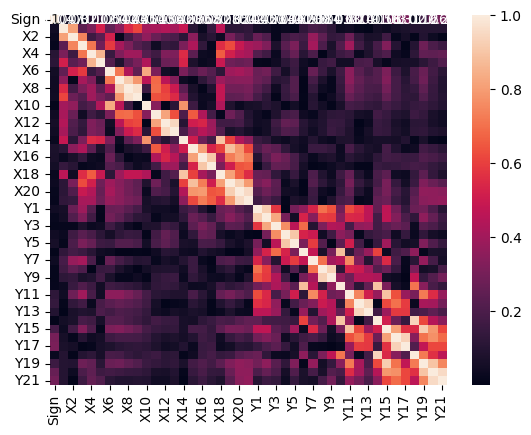

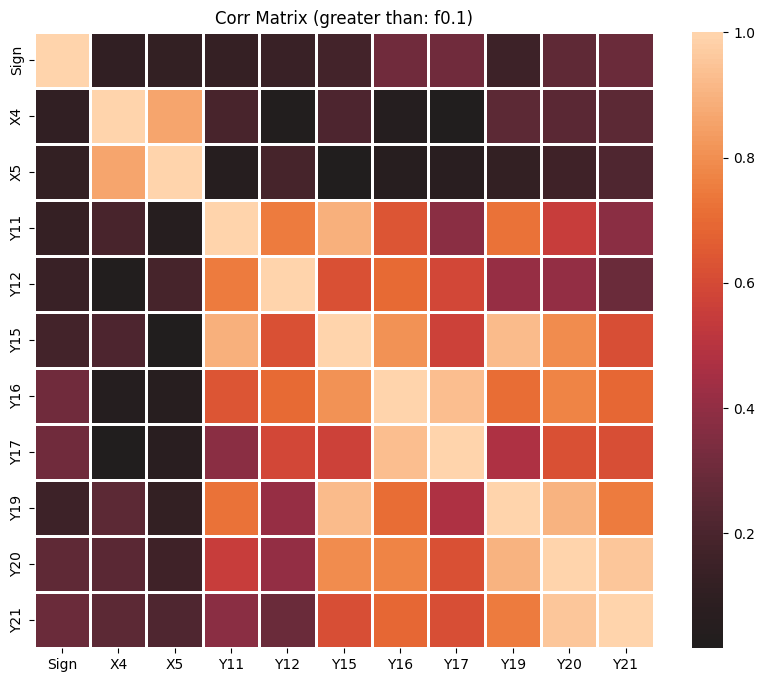

Accuracy for Logistic Regression: 0.7582417582417582
Accuracy for KNN Classifier: 0.6703296703296703
Accuracy for SVC Classifier: 0.7857142857142857
Accuracy for GaussianNB Classifier: 0.7032967032967034
Accuracy for Decision Tree Classifier: 0.5934065934065934
Accuracy for Random Forest Classifier: 0.7197802197802198
Accuracy for Extra Trees Classifier: 0.6758241758241759
Best model: SVC Classifier, Accuracy: 0.7857142857142857




Logistic Regression CV - acc :  0.7463963963963964
Logistic Regression test-acc :  0.7857142857142857
Logistic Regression: 12.493374824523926 sn

KNN Classifier CV - acc :  0.6836336336336336
KNN Classifier test-acc :  0.7252747252747253
KNN Classifier: 0.04686737060546875 sn

SVC Classifier CV - acc :  0.7028528528528529
SVC Classifier test-acc :  0.7417582417582418
SVC Classifier: 0.17708802223205566 sn

Naive Bayes GaussianNB CV - acc :  0.6402402402402403
Naive Bayes GaussianNB test-acc :  0.7032967032967034
Naive Bayes GaussianNB: 0.04855060577392578 s

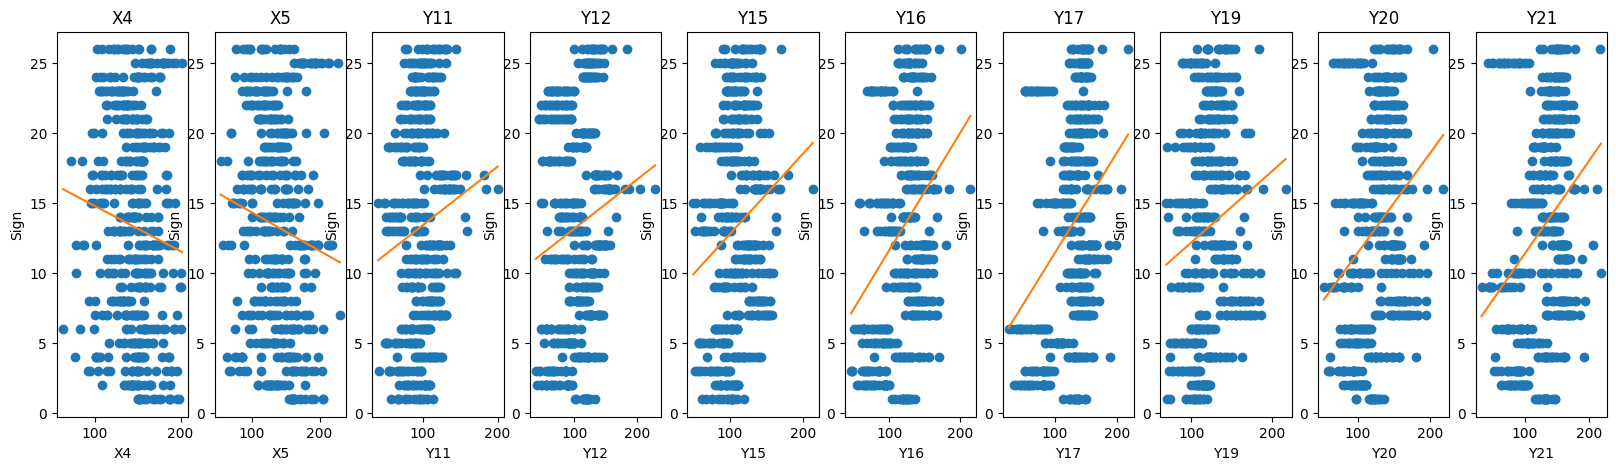

<Figure size 1500x1000 with 0 Axes>

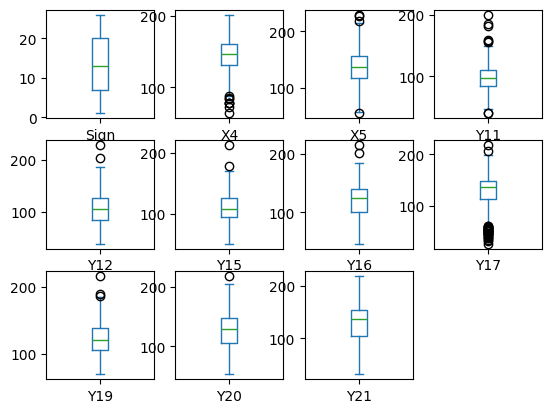

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 22 16:39:57 2024

@author: İrem Beyza Gül
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
data = pd.read_excel("sign_language_keypoints_xls.xlsx")

sign = data[["Sign"]]

df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['Sign_encoded'] = label_encoder.fit_transform(df['Sign']) + 1
df.drop(columns=['Sign'], inplace=True)
last_column = df.iloc[:, -1]  
df.drop(df.columns[-1], axis=1, inplace=True)  
df.insert(0, 'Sign', last_column) 

print("Shape of the dataset",df.shape)
print("dataset variable types:",df.dtypes)
print("first 10 rows of the dataset")
print(df.head(10))
print("statistical data of the dataset")
description=df.describe()
print(description)

df.hist(bins=10,figsize=(16,9),grid=False);


print("Data set Variable variables are related to each other")
corr=np.abs(df.corr(method='pearson'))
plt.figure()
sns.heatmap(corr, annot = True)


column_index = 0


selected_column_name = df.columns[column_index]


column_correlations = corr[selected_column_name]

threshold = 0.1

filtered_correlations = column_correlations[abs(column_correlations) >= threshold]


selected_columns = filtered_correlations.index


filtered_corr = corr.loc[selected_columns, selected_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")
plt.show()

new_df = df[selected_columns].copy()




features =new_df.drop(new_df.columns[0], axis=1)
sign=df.iloc[:,0:1]

plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, len(features.columns), i+1)
    x = new_df[col]
    y = new_df[new_df.columns[0]].values 
    plt.plot(x, y, 'o')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Sign')

plt.figure(figsize=(15, 10))
new_df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)


#CLASSİFİCATİON

x = data.iloc[:,1:].values
y = data.iloc[:,0].values 



from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=47)

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='sag', max_iter=1000)
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)
cm_logr = confusion_matrix(y_test, y_pred_logr)




from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', weights='uniform')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred_gnb)


#DECİSİON TREE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=None)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier 
etc = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=None)
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)
cm_etc = confusion_matrix(y_test, y_pred_etc)


from sklearn.metrics import accuracy_score

# Logistic Regression
accuracy_logr = accuracy_score(y_test, y_pred_logr)
print("Accuracy for Logistic Regression:", accuracy_logr)

# KNN Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy for KNN Classifier:", accuracy_knn)

# SVC Classifier
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy for SVC Classifier:", accuracy_svc)


#Naive Bayes GaussianNB
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy for GaussianNB Classifier:", accuracy_gnb)

#DECİSİON TREE
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy for Decision Tree Classifier:", accuracy_dtc)

#RANDOM FOREST
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy for Random Forest Classifier:", accuracy_rfc)

# ExtraTree 
accuracy_etc = accuracy_score(y_test, y_pred_etc)
print("Accuracy for Extra Trees Classifier:", accuracy_etc)
# Doğruluk değerlerini bir sözlükte toplama

models = {
    "Logistic Regression": accuracy_logr,
    "KNN Classifier": accuracy_knn,
    "SVC Classifier": accuracy_svc,
    "Naive Bayes GaussianNB": accuracy_gnb,
    "Decision Tree Classifier": accuracy_dtc,
    "Random Forest Classifier": accuracy_rfc,
    "Extra Tree Classifier": accuracy_etc
}

#
max_accuracy = max(models.values())
best_model = max(models, key=models.get)

print(f"Best model: {best_model}, Accuracy: {max_accuracy}")
print("\n")
print("\n")



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pickle

logistic_regression = LogisticRegression(solver='sag', max_iter=1000)
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', weights='uniform')
svc_classifier = SVC(kernel='linear')
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy')
random_forest_classifier = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=None)
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=None)

models = {
    "Logistic Regression": logistic_regression,
    "KNN Classifier": knn_classifier,
    "SVC Classifier": svc_classifier,
    "Naive Bayes GaussianNB": naive_bayes_classifier,
    "Decision Tree Classifier": decision_tree_classifier,
    "Random Forest Classifier": random_forest_classifier,
    "Extra Tree Classifier": extra_trees_classifier
}

num_folds = 10
results = {}

start_time0 = time.time()
for name, model in models.items():
    start_time = time.time()
    
    skfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=47)
    cv_results = cross_val_score(model, x_train, y_train, cv=skfold, scoring="accuracy")
    
    mean_accuracy = cv_results.mean()
    
    model.fit(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    results[name] = test_accuracy
    
    print(f"{name} CV - acc :  {mean_accuracy:.16f}")
    print(f"{name} test-acc :  {test_accuracy:.16f}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name.ljust(8)}: {elapsed_time} sn\n")
    
end_time0 = time.time()
elapsed_time = end_time0 - start_time0
print(f"{elapsed_time} sn")
print("\n")

best_model = max(results, key=results.get)
print("Best Model depen on test: ", best_model)

models_dict = dict(models)
# Train the best model
best_model_instance = models_dict.get(best_model)
best_model_instance.fit(x_train, y_train)

# Evaluate the performance of the best model on the test set
test_accuracy = best_model_instance.score(x_test, y_test)
print("Test set accuracy score (best model):", test_accuracy)

# Calculate evaluation metrics for the best model
y_pred = best_model_instance.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Print the evaluation metrics for the best model
print("\nEvaluation metric scores for best model which is {}:".format(best_model))
print("Test set accuracy:", test_accuracy)
print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)


best_model = max(results, key=results.get)
print("Best model:", best_model)


best_model_instance = models_dict.get(best_model)


with open(f'models_best_model.pkl', 'wb') as f:
    pickle.dump(best_model_instance, f)

print("\n")
